In [9]:
import tensorflow as tf
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

np.random.seed(0)
tf.random.set_seed(0)

(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

X_train  = X_train.reshape(X_train.shape[0],28,28, 1).astype('float32') / 255
X_test  = X_test.reshape(X_test.shape[0],28,28,1).astype('float32') / 255
Y_train  = tf.keras.utils.to_categorical(Y_train, 10)
Y_test  = tf.keras.utils.to_categorical(Y_test, 10)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.05667, saving model to ./model\01-0.0567.hdf5

Epoch 00002: val_loss improved from 0.05667 to 0.04146, saving model to ./model\02-0.0415.hdf5

Epoch 00003: val_loss improved from 0.04146 to 0.03552, saving model to ./model\03-0.0355.hdf5

Epoch 00004: val_loss improved from 0.03552 to 0.03262, saving model to ./model\04-0.0326.hdf5

Epoch 00005: val_loss improved from 0.03262 to 0.02771, saving model to ./model\05-0.0277.hdf5

Epoch 00006: val_loss improved from 0.02771 to 0.02744, saving model to ./model\06-0.0274.hdf5

Epoch 00007: val_loss improved from 0.02744 to 0.02557, saving model to ./model\07-0.0256.hdf5

Epoch 00008: val_loss did not improve from 0.02557

Epoch 00009: val_loss did not improve from 0.02557

Epoch 00010: val_loss did not improve from 0.02557

Epoch 00011: val_loss did not improve from 0.02557

Epoch 00012: val_loss did not improve from 0.02557

Epoch 00013: val_loss did not improve from 0.02557

Epoch 00014: val_lo

313/313 [==============================] - 2s 6ms/step - loss: 0.0295 - accuracy: 0.9929

 Test Accuracy : 0.9929


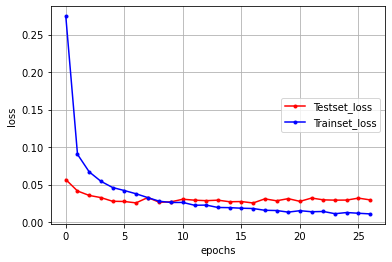

In [10]:
print("\n Test Accuracy : %.4f" %(model.evaluate(X_test, Y_test) [1]))


y_loss = history.history['loss']

y_vloss = history.history['val_loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

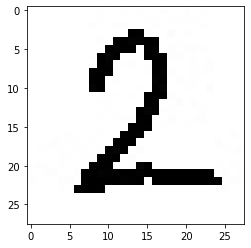

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
The Answer 0  is  [2]


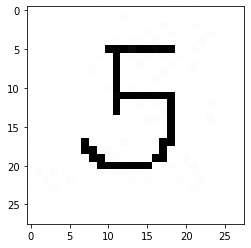

The Answer 1  is  [5]


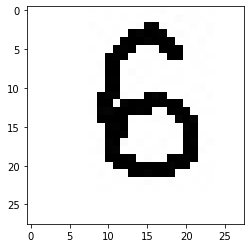

The Answer 2  is  [6]


In [12]:
import tensorflow as tf
import sys
import os
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np
import cv2

model = load_model('./model/17-0.0254.hdf5')
model.summary()

n = 3
test_num = [[0]*n for _ in range(n)]
jpg_list = list(map(int, input().split()))

for i in range(len(jpg_list)): 
    test_num[i] = cv2.imread('./model/minist_test/'+str(jpg_list[i])+'.jpg')
    test_num[i] = cv2.cvtColor(test_num[i], cv2.COLOR_BGR2GRAY)
    test_num[i] = cv2.bitwise_not(test_num[i])
    plt.imshow(test_num[i], cmap='Greys')
    plt.show()
    test_num[i] = test_num[i].reshape(1, 28, 28, 1).astype('float64') / 255
    print('The Answer',test_num[i],' is ', model.predict_classes(test_num[i]))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

<ipython-input-15-7c192165ec9d>:32: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(wrong_result)/4+1, 4, idx +1)


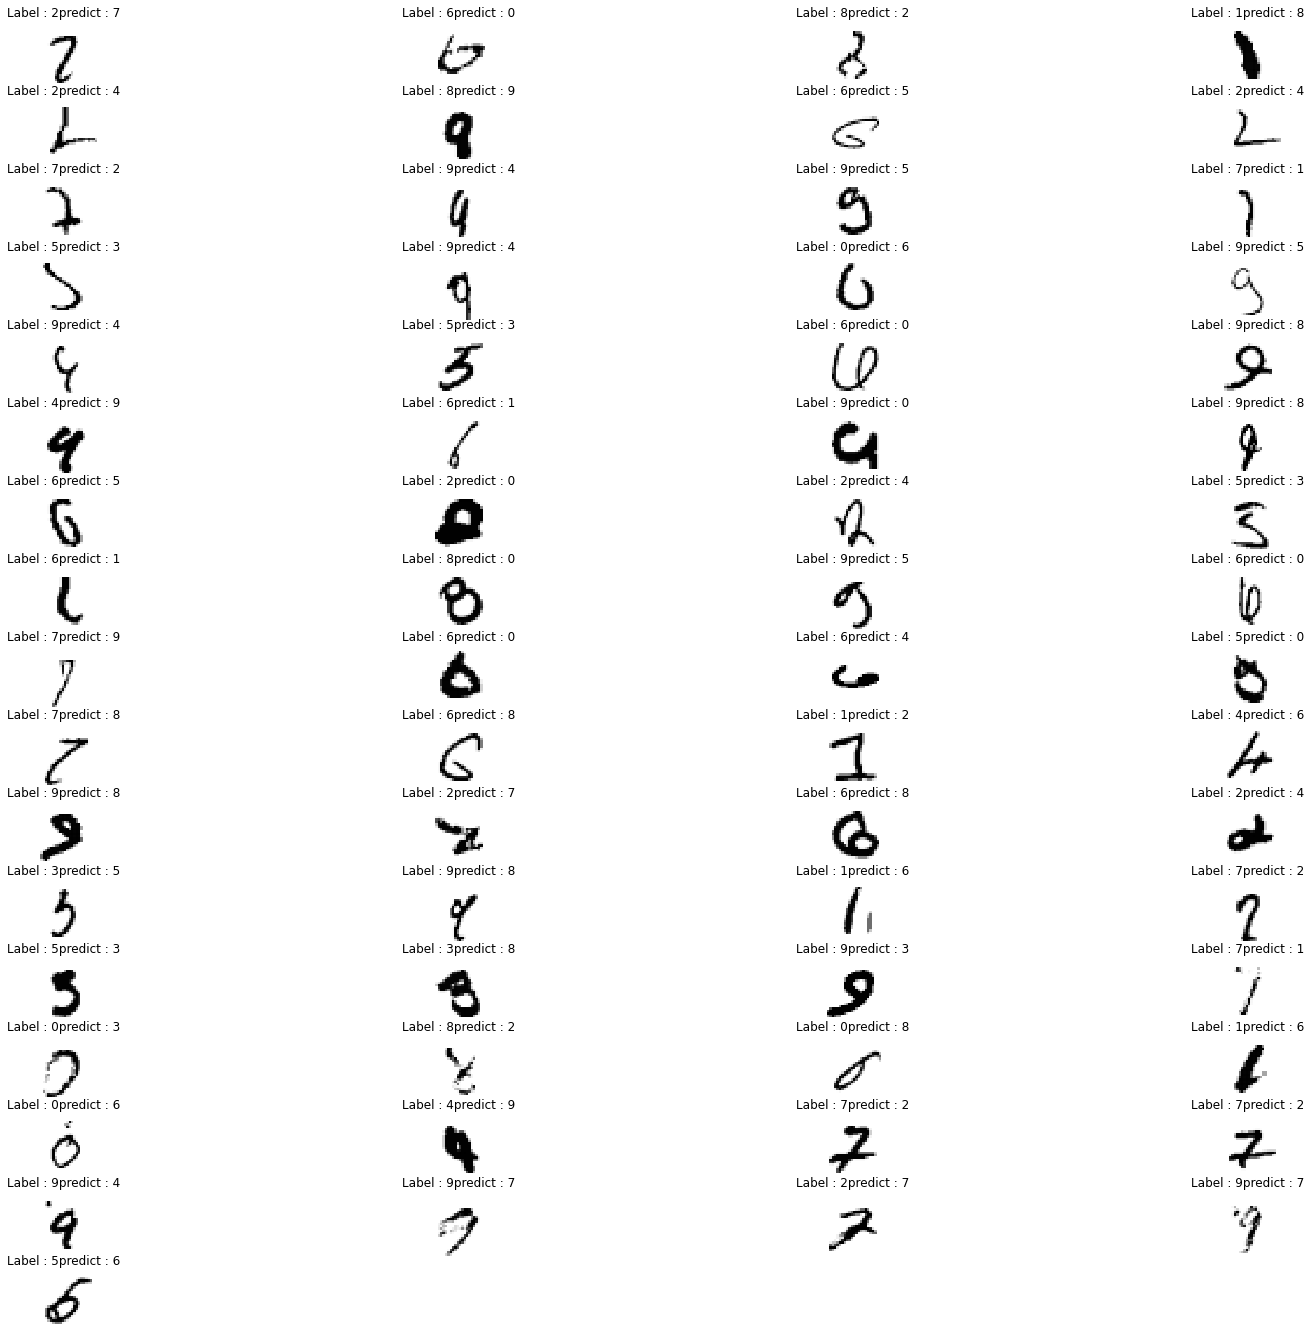

In [15]:
import tensorflow as tf
import sys
import os
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np
import cv2

from tensorflow.keras.datasets import mnist

(X_train, Y_class_train),(X_test, Y_class_test) = mnist.load_data()

X_train  = X_train.reshape(X_train.shape[0],28,28, 1).astype('float32') / 255
X_test  = X_test.reshape(X_test.shape[0],28,28,1).astype('float32') / 255

model = load_model('./model/17-0.0254.hdf5')
model.summary()

wrong_result = []
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis = 1)

for n in range(0, len(Y_class_test)):
    if predicted_labels[n] != Y_class_test[n]:
        wrong_result.append(n)
len(wrong_result)

plt.figure(figsize=(14,12))

for idx, n in enumerate(wrong_result):
    plt.subplot(len(wrong_result)/4+1, 4, idx +1) # 4줄 나오고 그다음으로 넘김
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.52)
    plt.imshow(X_test[n].reshape(28,28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label : ' +str(Y_class_test[n]) + 'predict : '+ str(predicted_labels[n]))
    plt.axis('off')
plt.show()